# Decision Tree

In [1]:
library(ggplot2)
library(caTools)
library(rpart)
library(rpart.plot)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'caTools' was built under R version 3.6.1"Warning message:
"package 'rpart.plot' was built under R version 3.6.1"

In [2]:
df <- read.csv("insurance.csv")

In [3]:
head(df)

age,sex,bmi,children,smoker,region,charges,insuranceclaim
19,0,27.900,0,1,3,16884.924,1
18,1,33.770,1,0,2,1725.552,1
28,1,33.000,3,0,2,4449.462,0
33,1,22.705,0,0,1,21984.471,0
32,1,28.880,0,0,1,3866.855,1
31,0,25.740,0,0,2,3756.622,0


In [4]:
str(df)

'data.frame':	1338 obs. of  8 variables:
 $ age           : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex           : int  0 1 1 1 1 0 0 0 1 0 ...
 $ bmi           : num  27.9 33.8 33 22.7 28.9 ...
 $ children      : int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker        : int  1 0 0 0 0 0 0 0 0 0 ...
 $ region        : int  3 2 2 1 1 2 2 1 0 1 ...
 $ charges       : num  16885 1726 4449 21984 3867 ...
 $ insuranceclaim: int  1 1 0 0 1 0 1 0 0 0 ...


## EDA

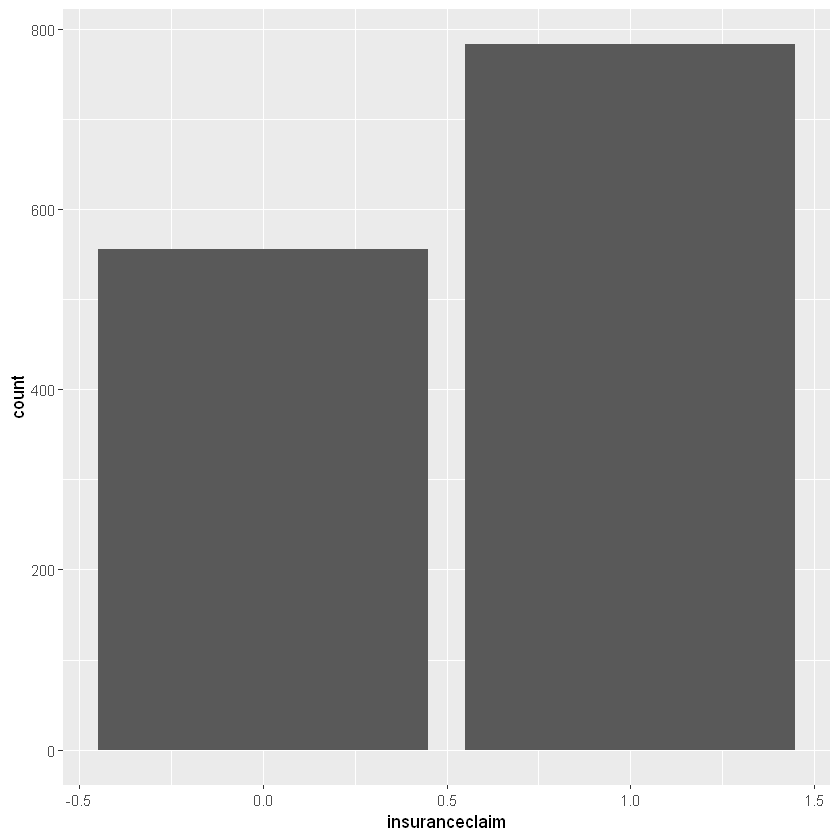

In [5]:
g <- ggplot(df, aes(insuranceclaim))

g + geom_bar() 

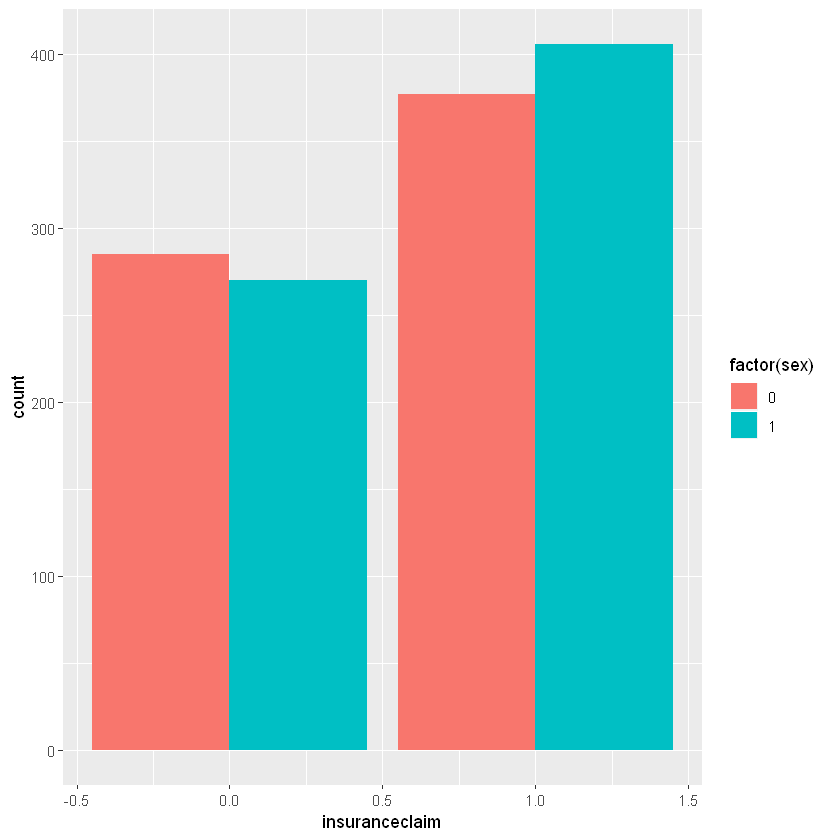

In [6]:
g <- ggplot(df, aes(insuranceclaim))
g + geom_bar(aes(fill = factor(sex)),position="dodge")

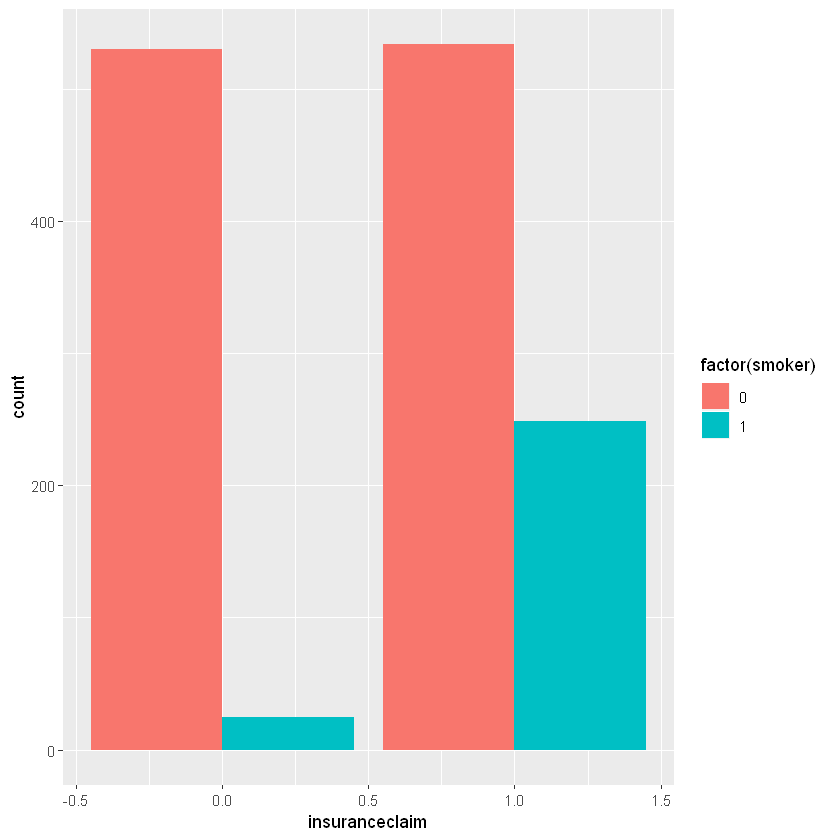

In [7]:
g <- ggplot(df, aes(insuranceclaim))
g + geom_bar(aes(fill = factor(smoker)),position="dodge")

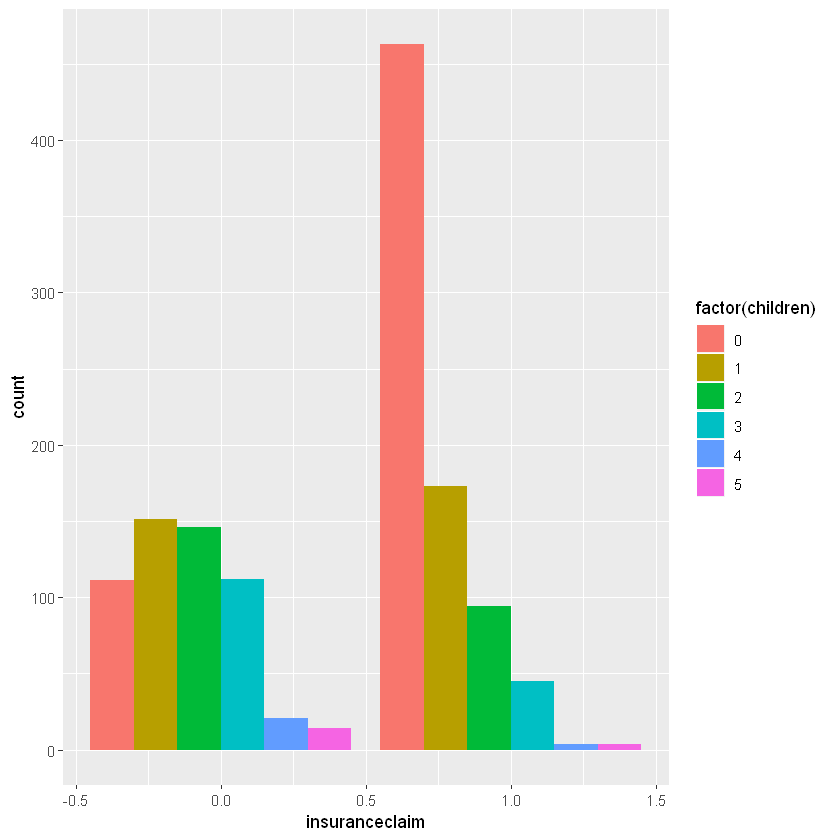

In [8]:
g <- ggplot(df, aes(insuranceclaim))
g + geom_bar(aes(fill = factor(children)),position="dodge")

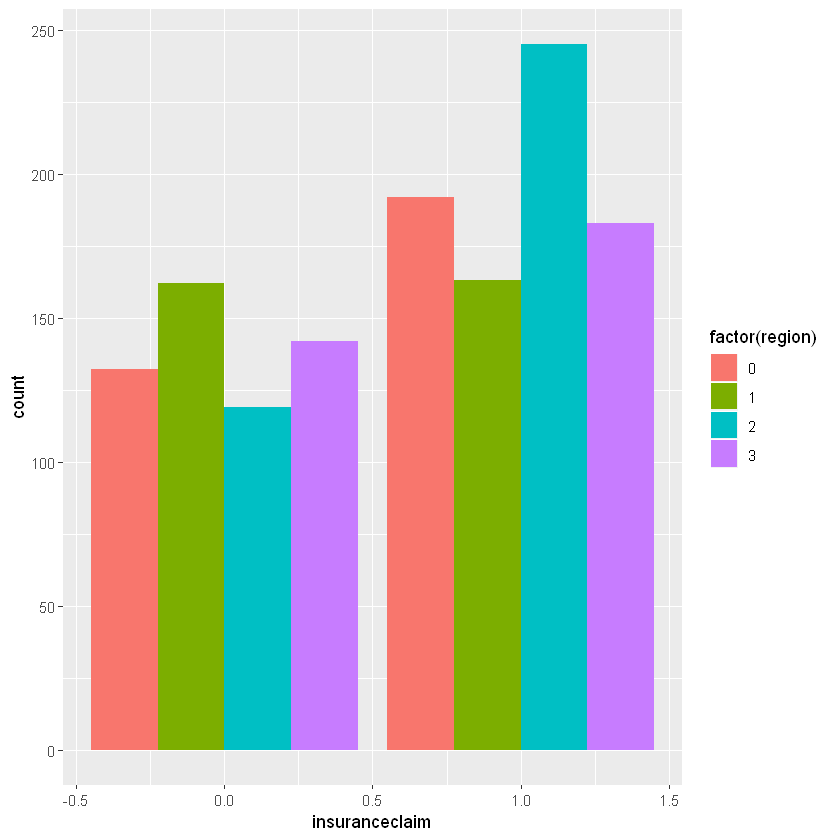

In [9]:
g <- ggplot(df, aes(insuranceclaim))
g + geom_bar(aes(fill = factor(region)),position="dodge")

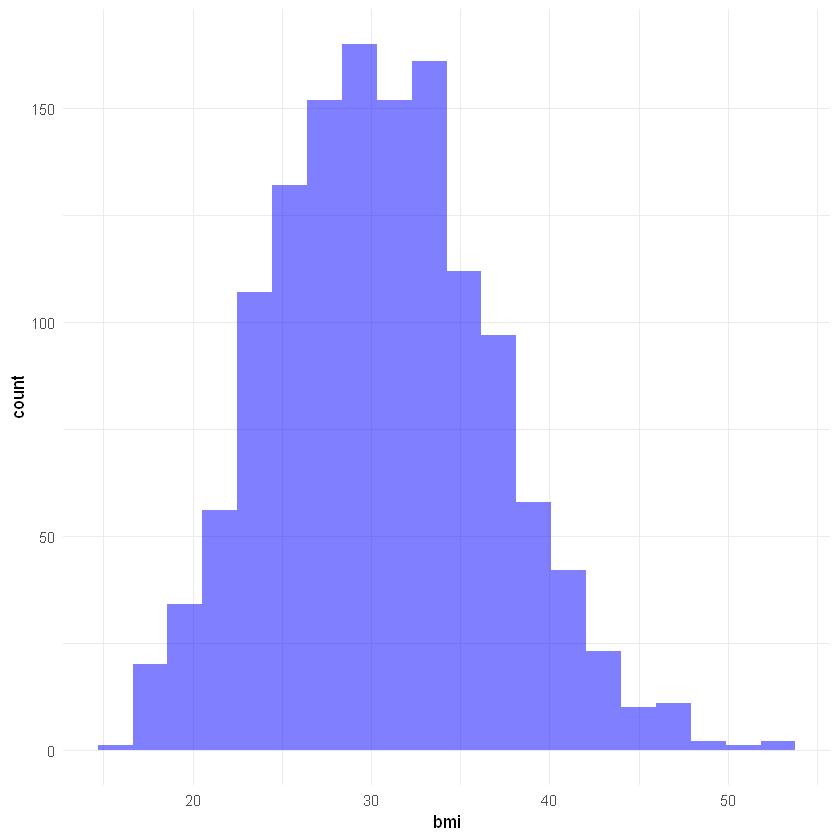

In [10]:
ggplot(df,aes(x=bmi)) + geom_histogram(bins=20,alpha=0.5,fill='blue') + theme_minimal()

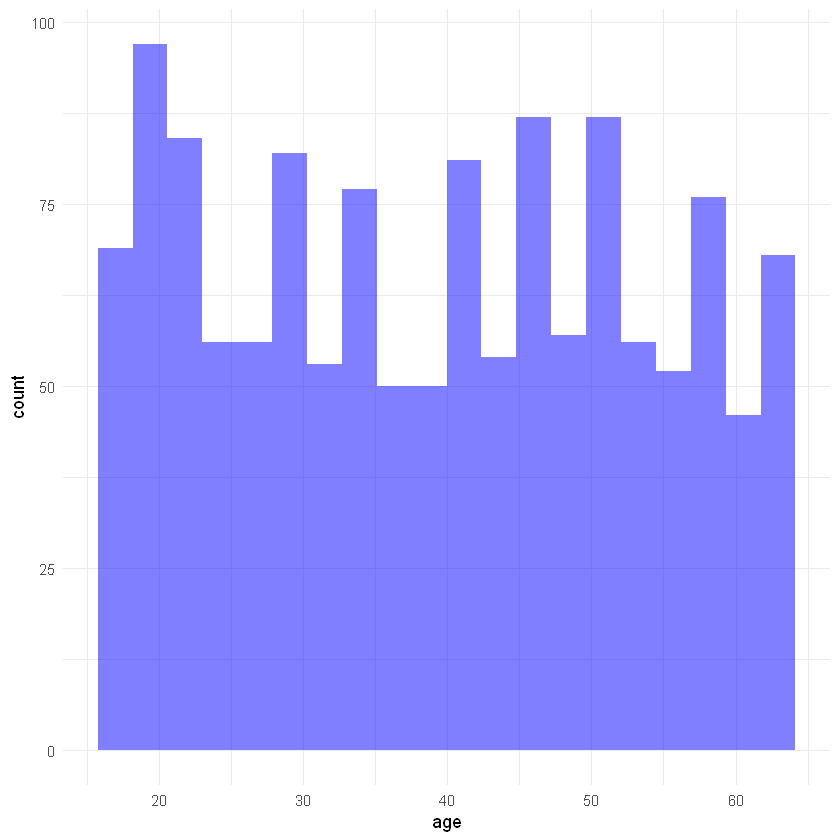

In [11]:
ggplot(df,aes(x=age)) + geom_histogram(bins=20,alpha=0.5,fill='blue') + theme_minimal()

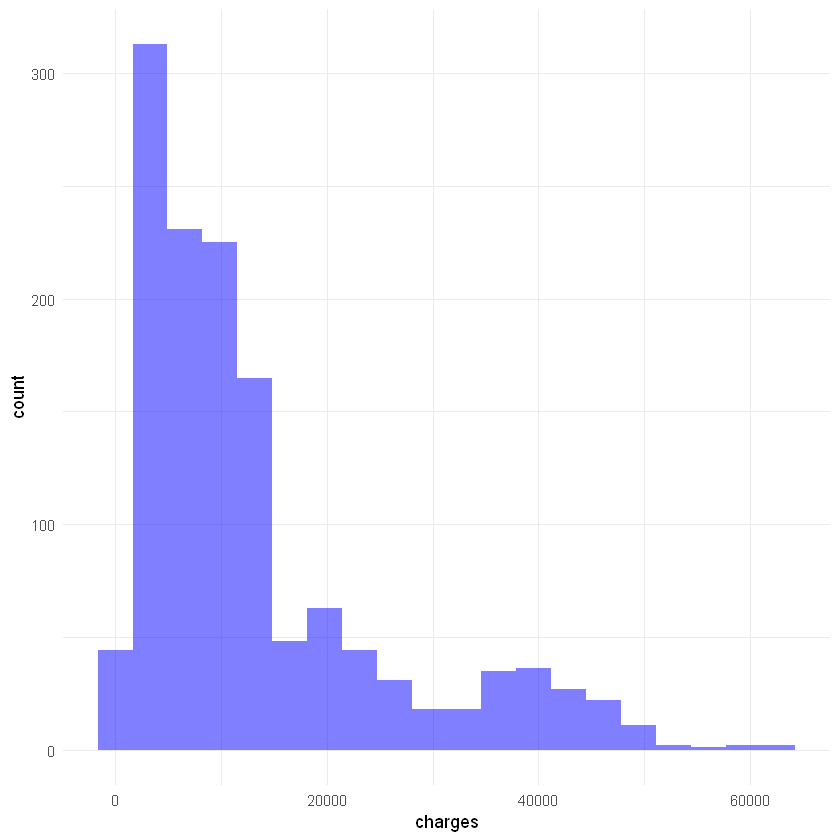

In [12]:
ggplot(df,aes(x=charges)) + geom_histogram(bins=20,alpha=0.5,fill='blue') + theme_minimal()

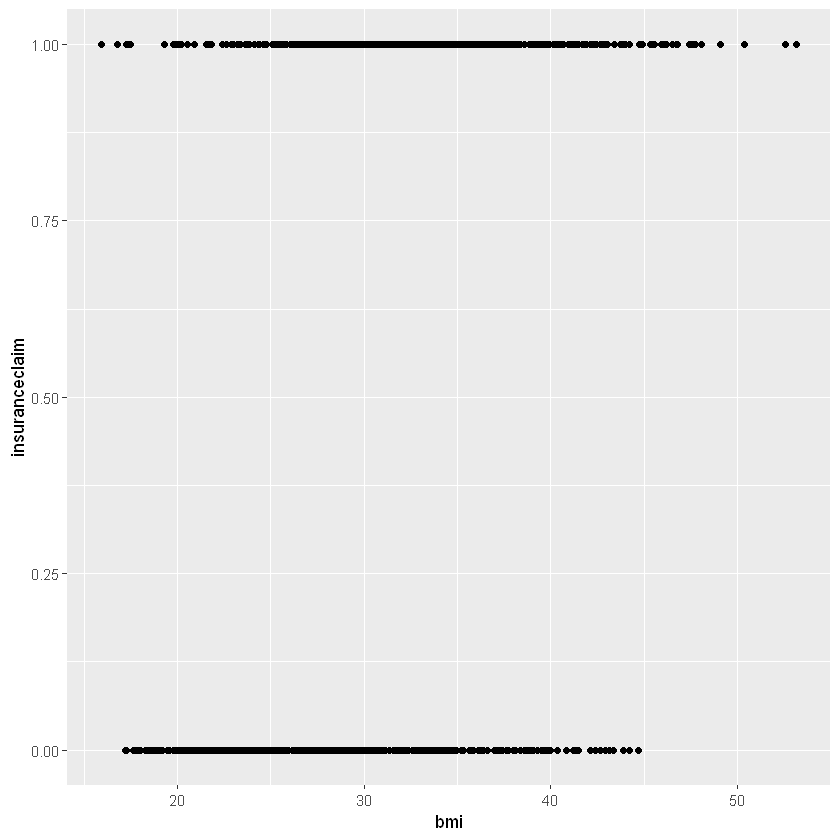

In [13]:
ggplot(df,aes(x=bmi,y=insuranceclaim)) + geom_point()

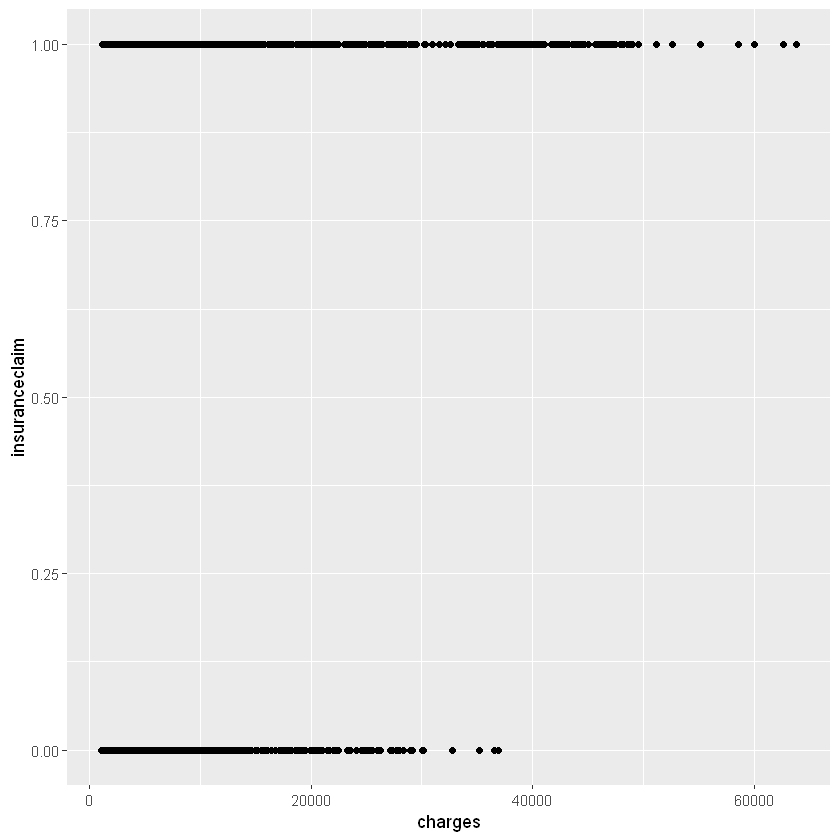

In [14]:
ggplot(df,aes(x=charges,y=insuranceclaim)) + geom_point()


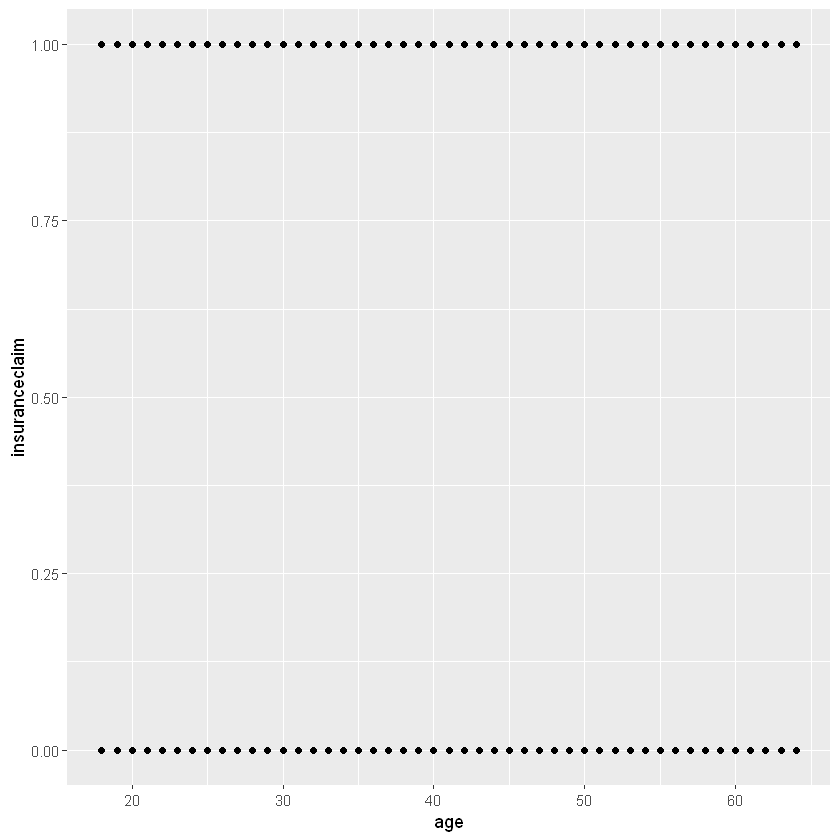

In [15]:
ggplot(df,aes(x=age,y=insuranceclaim)) + geom_point()


In [16]:
set.seed(101)

sample <- sample.split(df, SplitRatio = 0.70) # SplitRatio = percent of sample==TRUE

# Training Data
train = subset(df, sample == TRUE)

# Testing Data
test = subset(df, sample == FALSE)

## Model

In [17]:
tree <- rpart(insuranceclaim ~ . , method='class', data=train)

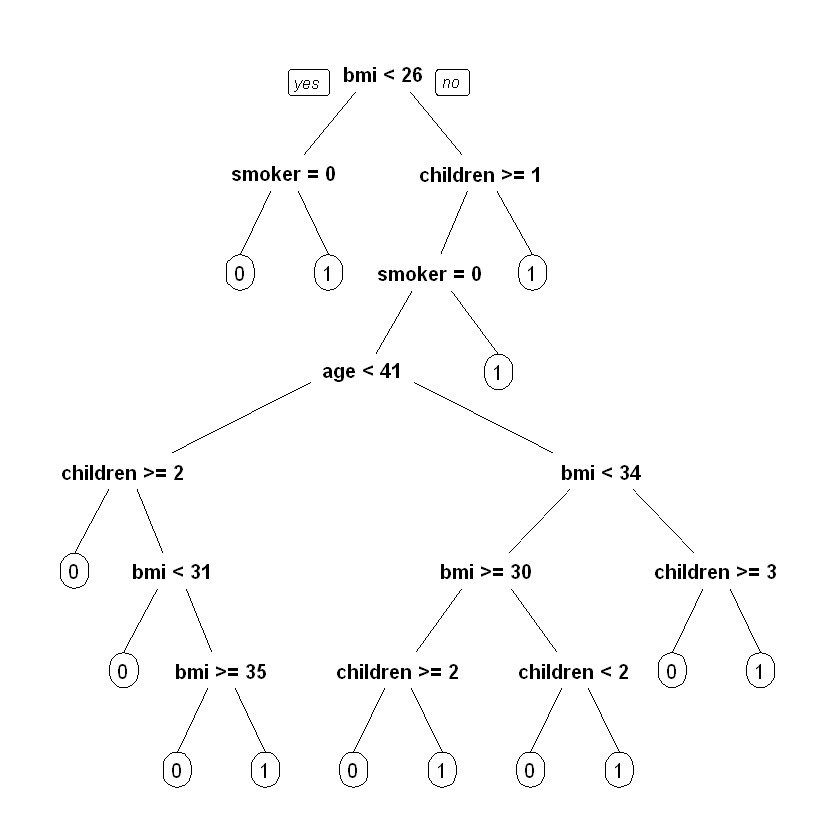

In [18]:
prp(tree)

In [19]:
results <- predict(tree,newdata=test,type='class')

In [20]:
confuse.matrix <- table(test$insuranceclaim,results)

In [21]:
confuse.matrix

   results
      0   1
  0 184  14
  1  15 288

In [22]:
tn <- confuse.matrix[1]
tn

[1] 184

In [23]:
tp <- confuse.matrix[4]
tp

[1] 288

In [24]:
fp <- confuse.matrix[3]
fp

[1] 14

In [25]:
fn <- confuse.matrix[2]
fn

[1] 15

In [26]:
accuracy <- (tp+tn)/(tp+tn+fp+fn)

In [27]:
accuracy

[1] 0.9421158

In [28]:
precision <- (tp)/(tp+fp)

In [29]:
precision

[1] 0.9536424

In [30]:
recall <- (tp)/(tp+fn)

In [31]:
recall

[1] 0.950495

# Pruning

In [32]:
tree2 <- rpart(insuranceclaim ~ . , method='class', data=train,
             control=rpart.control(maxdepth = 3))

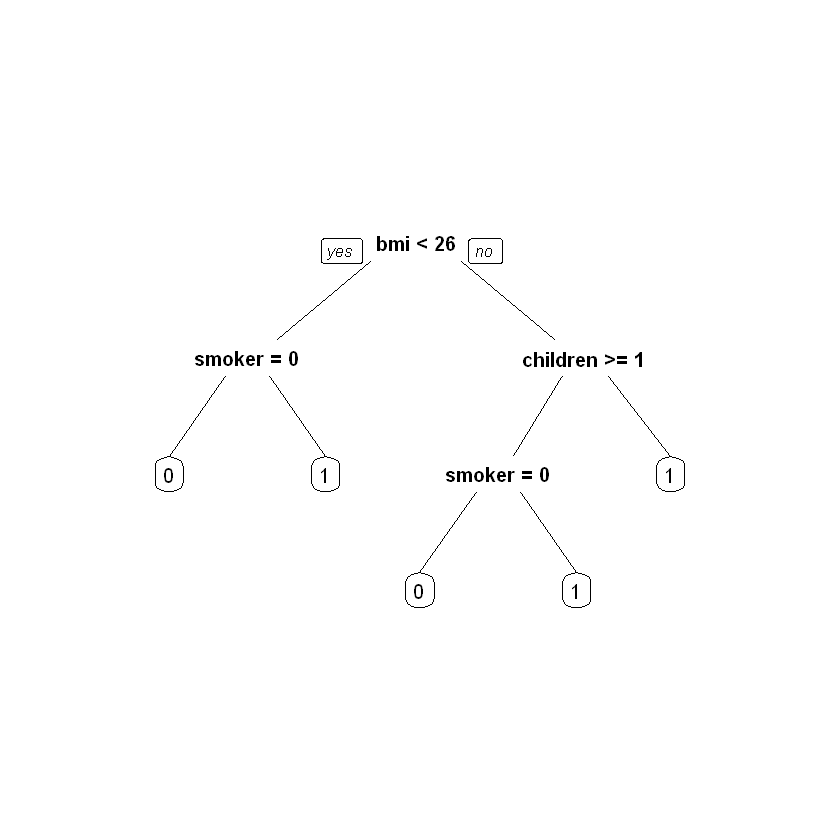

In [33]:
prp(tree2)